# 차원 축소 

- 과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음. 

- 차원의 저주
    - 일반적인 머신러닝 문제는 수천 ~ 수백만개의 특성을 가지는 경우도 있음.
    - 특성이 너무 많으면 훈련이 느리게 될 뿐만 아니라 좋은 솔루션을 찾기 어렵게 됨. 
    - 이런 문제를 차원의 저주(curse of dimensionality)라고 함.
    - 축이 늘어나면 늘어날수록 최적 솔루션 공간 비율은 줄어들고, 남는 공간의 비율은 늘어나게 됨. (2차원 --> 3차원)
    
- 차원 축소 (dimensionality reduction)
    - 데이터를 가장 잘 나타내는 일부 특성을 선택해서 데이터 크기를 줄이고 모델의 성능을 향상시키는 방법 
        - 예) 이미지 경계면의 배경 부분 제거, 서로 인접한 픽셀들 결합 등 

# 주성분 분석 (Principal Component Analysis)

- 데이터에 있는 분산이 큰 방향(주성분)을 찾는 것 
    - 분산 : 데이터가 퍼져있는 정도 
    
<img src = "pca1.gif">

- 위 그림의 데이터에서는 오른쪽 위를 향하는 분산이 가장 큼. 
- 원본 데이터를 가장 잘 설명하는 방향이 주성분(principal component)
    - 주성분은 데이터가 가진 특성을 가장 잘 나타내기 때문에 주성분에 데이터롤 투영하면 정보의 손실을 줄이면서 차원을 축소 가능 
   
<img src = "pca2.png">

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [2]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

pca = PCA(n_components=50) # 주성분 개수 
pca.fit(fruits_2d)

# pca가 찾은 주성분 모양 확인
print(pca.components_.shape)

(50, 10000)


In [3]:
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 수 
    
    # 한 줄에 10개씩 이미지 그릴 때, 
    # 몇 개 행이 필요할지 행 개수 계산 
    rows = int(np.ceil(n/10))
    cols = 10
    
    fig, axs= plt.subplots(rows,
                           cols, 
                           figsize=(cols*ratio, rows*ratio),
                           squeeze=False)
    # 자동전처리 기능 켜면 깨질수있으므로 False 
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
            
    plt.show()

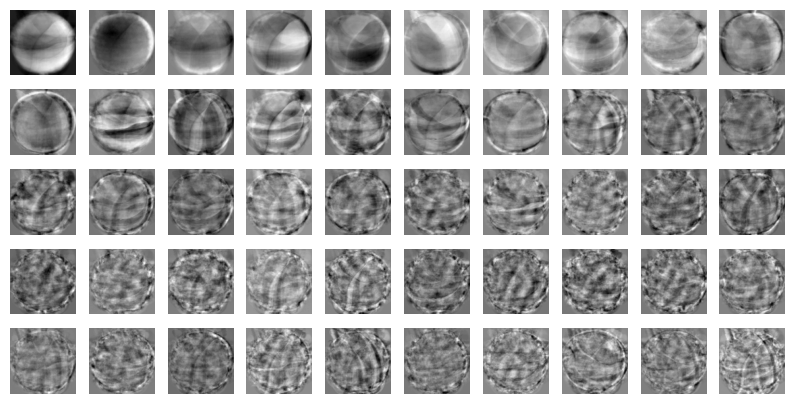

In [4]:
draw_fruits(pca.components_.reshape(-1,100,100))

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄. 
    - 데이터셋에 있는 특징을 찾아낸 것 
- 1번 특성이 얼마나 강한지, 2번 특성이 얼마나 강한지 ... 50번 특성은 약함 

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
# 원본 데이터의 차원을 50차원으로 축소 
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성 

- 1만개의 특성을 50개로 줄이면 정보 손실이 없을 수는 없지만, 정보 손실을 최소한으로 했기 때문에 축소된 데이터에서 원본 데이터에 가깝게 복구할 수는 있음. 

In [7]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

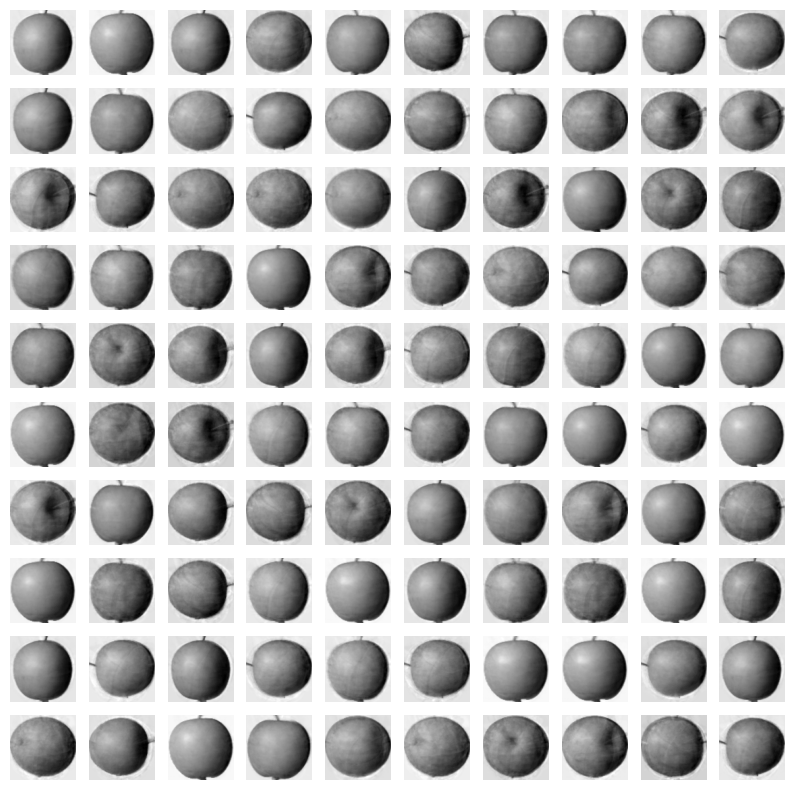

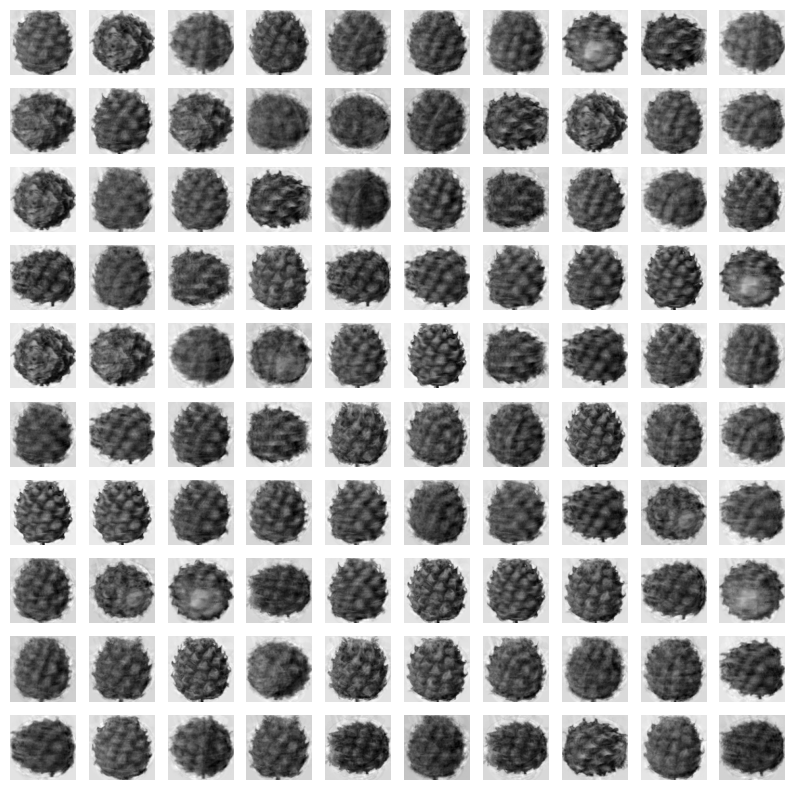

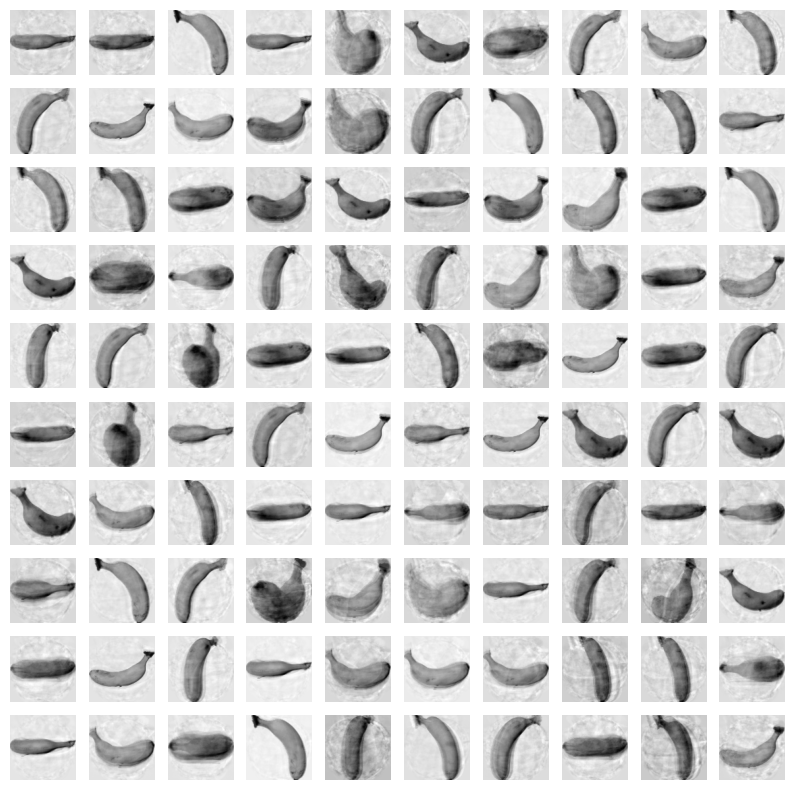

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

- 경계면 중요치 않아서 흐려짐. 
- 사과 꼭다리 부분도 중요치 않다고 판단해서 흐려짐. 
- pca 후 늘렸음에도 정보 손실이 그렇게 많이 일어나지 않았음 확인 가능 

# 설명된 분산 (explained variance)

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값 
- pca 클래스의 explained_variance_ratio_ 에 설명된 분산 비율이 기록되어 있음. 

In [10]:
# 50개의 주성분으로 표현하고 있는 총 분산 비율 
np.sum(pca.explained_variance_ratio_)

0.9214556672802361

In [11]:
# 각 50개 주성분의 분산 설명 비율 
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480346,
       0.00447834, 0.00437315, 0.00408041, 0.00389479, 0.00372436,
       0.00359287, 0.00331472, 0.00317746, 0.00304286, 0.00303687,
       0.00288845, 0.00275804, 0.00264948, 0.00255882, 0.0025199 ,
       0.00247232, 0.00239565, 0.0023047 , 0.00221852, 0.00215727,
       0.00213875, 0.00196048, 0.00192335, 0.00189284, 0.00183267,
       0.00177859, 0.00171255, 0.00167511, 0.0016376 , 0.00160452])

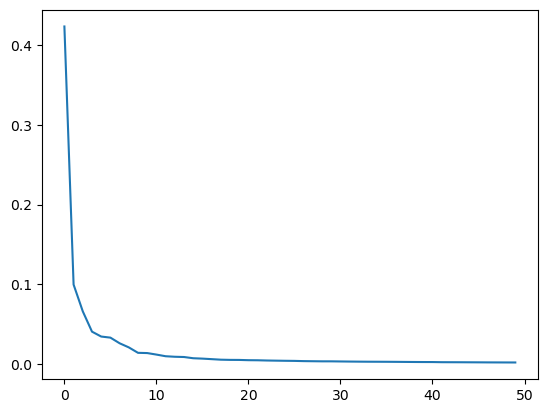

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용하기 

In [14]:
# 레이블 생성 
# 사과 = 0, 파인애플 = 1, 바나나 = 2
y = np.array([0]*100 + [1]*100 + [2]*100)

lr = LogisticRegression()

# 원본 데이터로 성능 테스트
scores = cross_validate(lr, fruits_2d, y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.367779016494751


In [15]:
# pca로 축소한 데이터로 성능 테스트
scores = cross_validate(lr, fruits_pca, y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.016288328170776366


# 설명된 분산의 비율로 pca 사용 

In [16]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 설정 
pca = PCA(n_components=0.5)
# 실수 넣으면 설명된 분산 비율이 50% 넘는 값으로 
# 주성분 개수가 설정됨 
pca.fit(fruits_2d)

# 2개의 특성만으로 원본데이터 분산의 50% 표현 가능 
print(pca.n_components_)

2


In [17]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # (300, 2)

(300, 2)

In [18]:
scores = cross_validate(lr, fruits_pca, y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.02397637367248535


C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

- 2개로 칼럼 줄였음에도 성능이 거의 비슷함. 

# 차원 축소된 데이터로 kmeans 사용 

In [20]:
km = KMeans(n_clusters=3, random_state=4)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


- pca 했더니 1개(바나나)가 자리를 잘 찾아감...

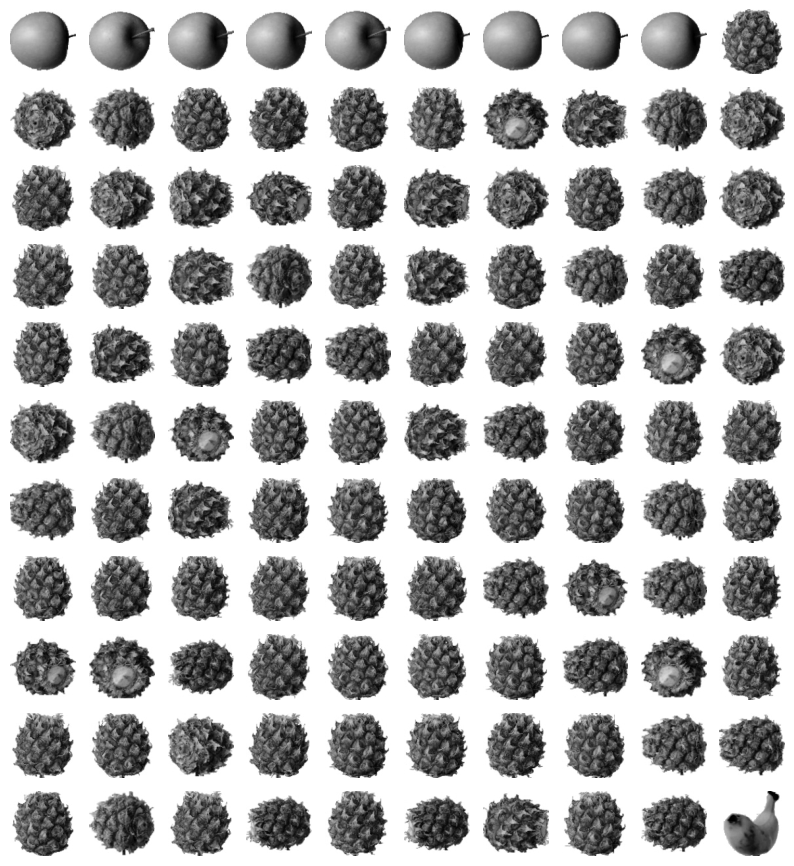

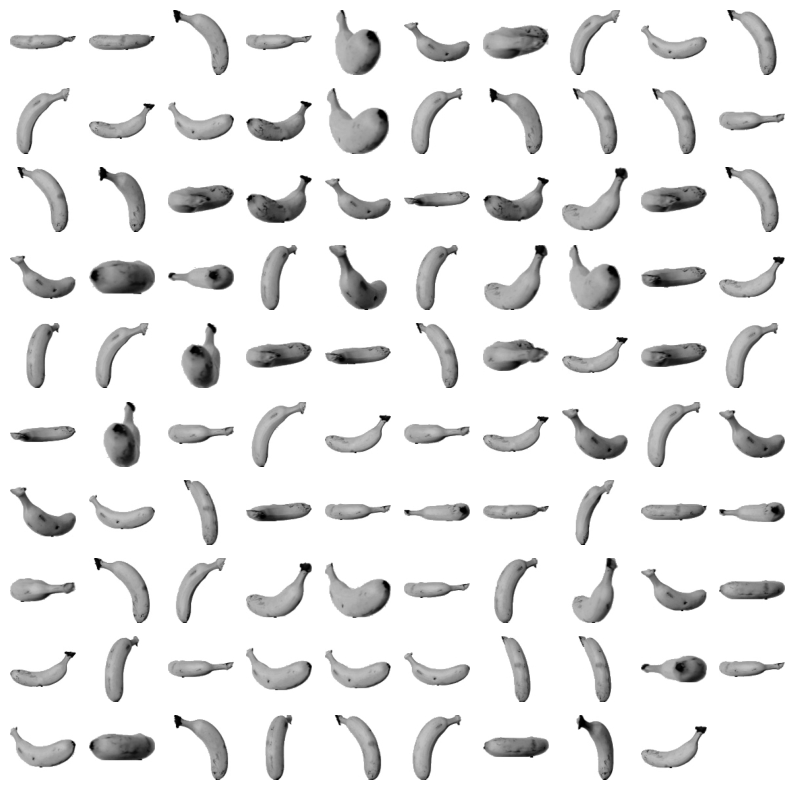

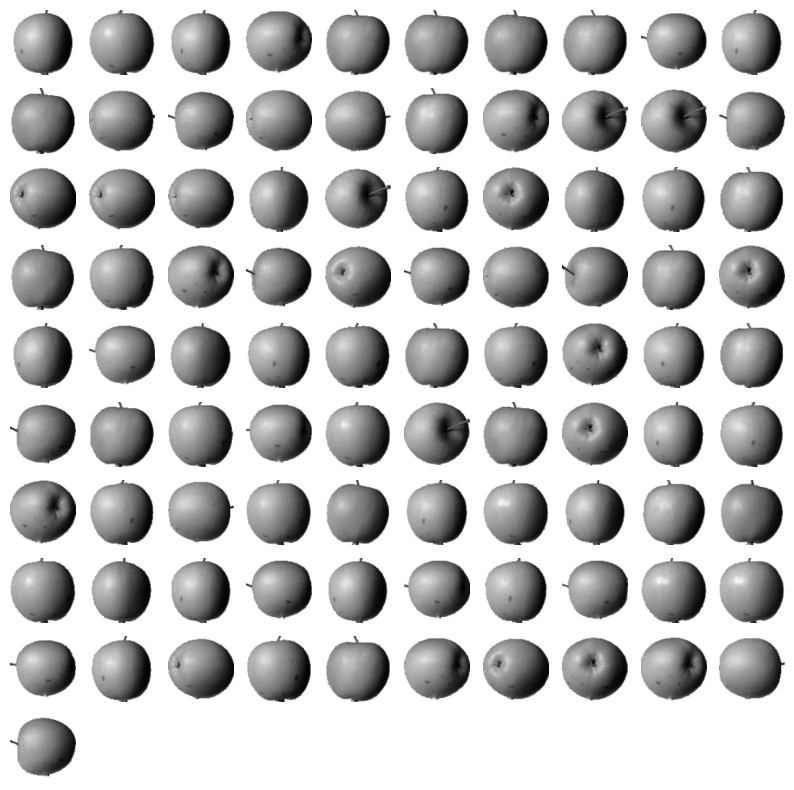

In [21]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print()

## 차원 축소된 데이터로 시각화

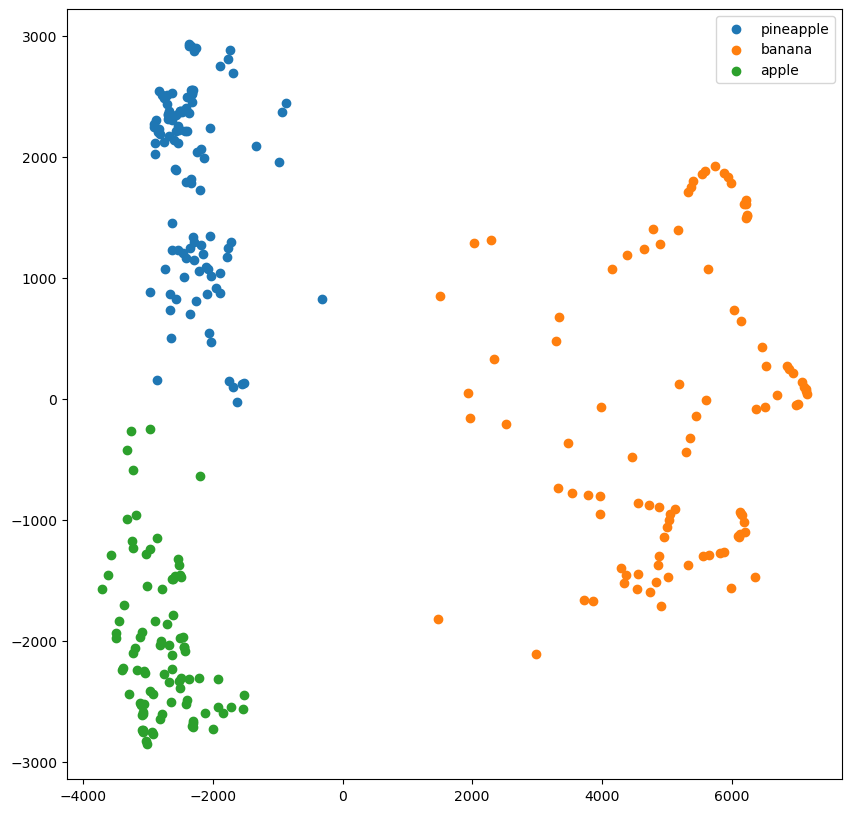

In [22]:
plt.figure(figsize=(10,10))

for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    # 첫번째 칼럼 값, 두번째 칼럼 값 
    
plt.legend(['pineapple', 'banana', 'apple'])

plt.show()

In [23]:
data

array([[-2778.41779459, -1571.87380954],
       [-3078.27365136, -2739.27040962],
       [-2620.61072939, -1486.87055253],
       [-3113.71771062, -2530.02283015],
       [-2520.64705144, -2330.64791173],
       [-2711.38755162, -1857.35297386],
       [-2884.74283654, -1836.15286362],
       [-2310.99240338, -2660.46264957],
       [-1521.26665012, -2445.37438374],
       [-2486.91643797, -1475.55043726],
       [-2800.83912843, -2001.07115818],
       [-2810.56248913, -2034.36322556],
       [-2209.09841637, -2303.76592225],
       [-2917.38810303, -2438.42530884],
       [-2198.1718942 ,  -636.80184589],
       [-2317.61818126, -2704.80151487],
       [-3289.84664277, -2436.3934378 ],
       [-3563.8760831 , -1290.01167006],
       [-3708.64597097, -1575.33617706],
       [-2423.96625858, -2080.63343889],
       [-3169.13983546, -2238.74224157],
       [-3059.33441459, -2250.14899831],
       [-2745.8264558 , -2276.96357422],
       [-3185.62291444,  -958.24335683],
       [-2971.17

- 값들의 평균으로 히스토그램 시각화 했을 때 파인애플-애플 간 겹치는 부분이 있었는데, pca 차원축소 하여 시각화하니 한눈에 나뉘는 것을 볼 수 있음. 